In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

spotify_population = pd.read_feather("./data/spotify_2000_2020.feather")
attrition_pop = pd.read_feather("./data/attrition.feather")

In [20]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sample
print(attrition_samp)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1134   35        0.0      Travel_Rarely        583  Research_Development   
1150   52        0.0         Non-Travel        585                 Sales   
531    33        0.0      Travel_Rarely        931  Research_Development   
395    31        0.0      Travel_Rarely       1332  Research_Development   
392    29        0.0      Travel_Rarely        942  Research_Development   
...   ...        ...                ...        ...                   ...   
361    27        0.0  Travel_Frequently       1410                 Sales   
1180   36        0.0      Travel_Rarely        530                 Sales   
230    26        0.0      Travel_Rarely       1443                 Sales   
211    29        0.0  Travel_Frequently        410  Research_Development   
890    30        0.0  Travel_Frequently       1312  Research_Development   

      DistanceFromHome      Education    EducationField  \
1134                25      

In [21]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

In [22]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
print(attrition_sys_samp)

      Age  Attrition BusinessTravel  DailyRate            Department  \
0      21        0.0  Travel_Rarely        391  Research_Development   
21     19        0.0  Travel_Rarely       1181  Research_Development   
42     45        0.0  Travel_Rarely        252  Research_Development   
63     23        0.0  Travel_Rarely        373  Research_Development   
84     30        1.0  Travel_Rarely        945                 Sales   
...   ...        ...            ...        ...                   ...   
1365   48        0.0  Travel_Rarely        715  Research_Development   
1386   48        0.0  Travel_Rarely       1355  Research_Development   
1407   50        0.0  Travel_Rarely        989  Research_Development   
1428   50        0.0     Non-Travel        881  Research_Development   
1449   52        0.0  Travel_Rarely        699  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                   15        College  Life_Sciences   

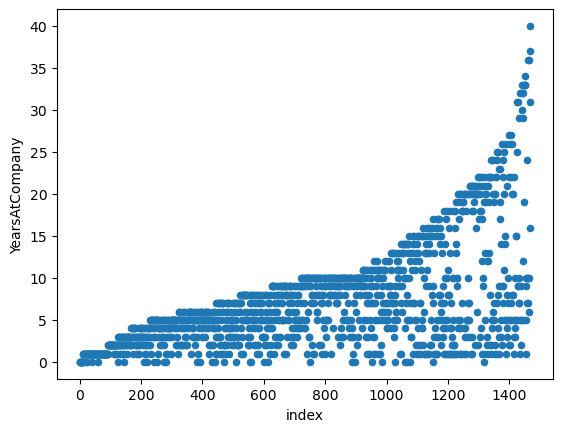

In [23]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

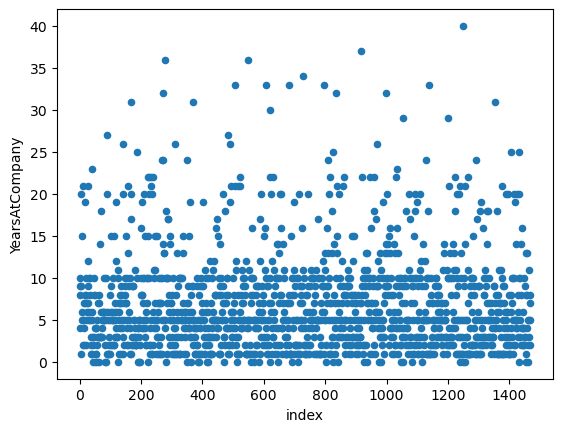

In [24]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

In [25]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop["Education"].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

Education
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: proportion, dtype: float64


In [26]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby("Education").sample(frac=.4, random_state=2022)


# Print the sample
print(attrition_strat)

Education
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: proportion, dtype: float64
      Age  Attrition     BusinessTravel  DailyRate            Department  \
1191   53        0.0      Travel_Rarely        238                 Sales   
407    29        0.0  Travel_Frequently        995  Research_Development   
1233   59        0.0  Travel_Frequently       1225                 Sales   
366    37        0.0      Travel_Rarely        571  Research_Development   
702    31        0.0  Travel_Frequently        163  Research_Development   
...   ...        ...                ...        ...                   ...   
733    38        0.0  Travel_Frequently        653  Research_Development   
1061   44        0.0  Travel_Frequently        602       Human_Resources   
1307   41        0.0      Travel_Rarely       1276                 Sales   
1060   33        0.0      Travel_Rarely        516  Research_Develo

In [27]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education')\
	.sample(frac=0.4, random_state=2022)

# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)

Education
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: proportion, dtype: float64
Education
Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: proportion, dtype: float64


In [28]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby("Education").sample(n=30, random_state=2022)


# Print the sample
print(attrition_eq)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1191   53        0.0      Travel_Rarely        238                 Sales   
407    29        0.0  Travel_Frequently        995  Research_Development   
1233   59        0.0  Travel_Frequently       1225                 Sales   
366    37        0.0      Travel_Rarely        571  Research_Development   
702    31        0.0  Travel_Frequently        163  Research_Development   
...   ...        ...                ...        ...                   ...   
774    33        0.0      Travel_Rarely        922  Research_Development   
869    45        0.0      Travel_Rarely       1015  Research_Development   
530    32        0.0      Travel_Rarely        120  Research_Development   
1049   48        0.0      Travel_Rarely        163                 Sales   
350    29        1.0      Travel_Rarely        408  Research_Development   

      DistanceFromHome      Education    EducationField  \
1191                 1  Belo

In [29]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education')\
	.sample(n=30, random_state=2022)      

# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Education
Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: proportion, dtype: float64


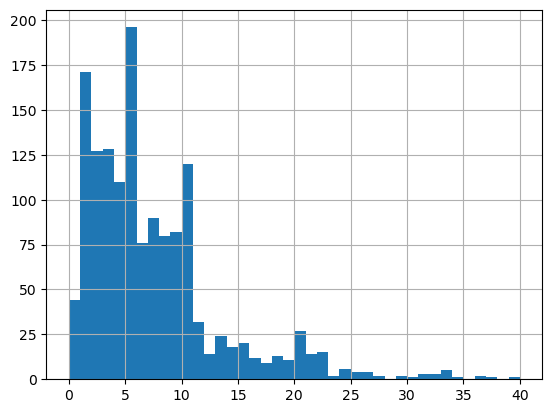

In [30]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop["YearsAtCompany"].hist(bins=np.arange(0, 41, 1))

plt.show()

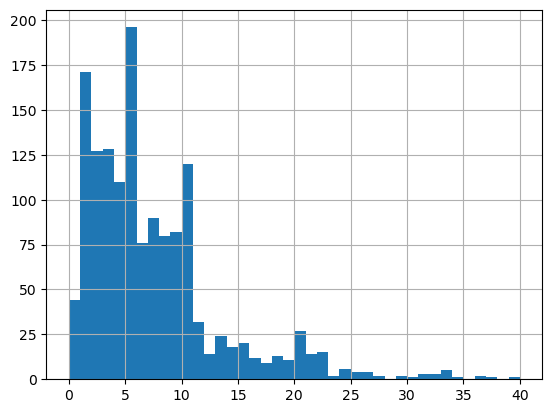

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1335   44        0.0      Travel_Rarely       1313  Research_Development   
665    33        0.0      Travel_Rarely        586                 Sales   
1010   36        0.0  Travel_Frequently       1480  Research_Development   
813    30        0.0      Travel_Rarely        231                 Sales   
647    33        0.0  Travel_Frequently        508                 Sales   
...   ...        ...                ...        ...                   ...   
1449   52        0.0      Travel_Rarely        699  Research_Development   
1223   50        0.0         Non-Travel        145                 Sales   
1085   38        0.0      Travel_Rarely       1333  Research_Development   
731    35        0.0         Non-Travel       1097  Research_Development   
950    34        0.0      Travel_Rarely       1130  Research_Development   

      DistanceFromHome Education    EducationField EnvironmentSatisfaction  \
1335     

In [31]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Print the sample
print(attrition_weight)

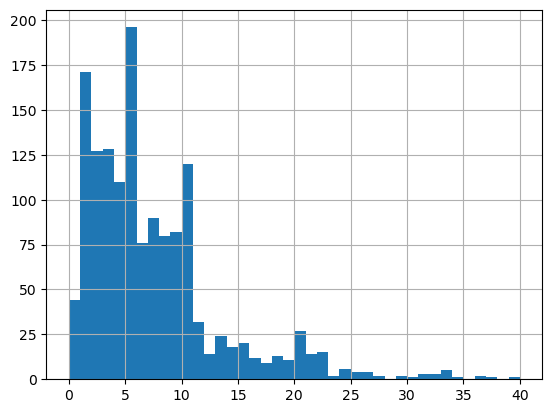

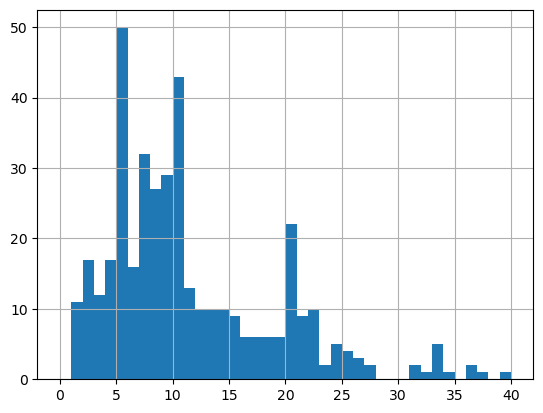

In [32]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

In [33]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(list(job_roles_pop), k=4)

# Print the result
print(job_roles_samp)

['Human_Resources', 'Laboratory_Technician', 'Sales_Representative', 'Manager']


In [34]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Print the result
print(attrition_filtered)

      Age  Attrition BusinessTravel  DailyRate            Department  \
0      21        0.0  Travel_Rarely        391  Research_Development   
2      18        1.0  Travel_Rarely        230  Research_Development   
5      27        0.0     Non-Travel        443  Research_Development   
6      18        0.0     Non-Travel        287  Research_Development   
7      18        1.0     Non-Travel        247  Research_Development   
...   ...        ...            ...        ...                   ...   
1461   55        0.0  Travel_Rarely        685                 Sales   
1462   54        0.0  Travel_Rarely        584  Research_Development   
1464   55        0.0  Travel_Rarely        452  Research_Development   
1465   55        0.0  Travel_Rarely       1117                 Sales   
1466   58        0.0     Non-Travel        350                 Sales   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                   15        College  Life_Sciences   

In [35]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby("JobRole").sample(n=10, random_state=2022)


# Print the sample
print(attrition_clust)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1348   44        1.0      Travel_Rarely       1376       Human_Resources   
886    41        0.0         Non-Travel        552       Human_Resources   
983    39        0.0      Travel_Rarely        141       Human_Resources   
88     27        1.0  Travel_Frequently       1337       Human_Resources   
189    34        0.0      Travel_Rarely        829       Human_Resources   
160    24        0.0  Travel_Frequently        897       Human_Resources   
839    46        0.0      Travel_Rarely        991       Human_Resources   
966    30        0.0      Travel_Rarely       1240       Human_Resources   
162    28        0.0         Non-Travel        280       Human_Resources   
1231   37        0.0      Travel_Rarely       1239       Human_Resources   
599    33        0.0      Travel_Rarely       1099  Research_Development   
620    40        0.0      Travel_Rarely        543  Research_Development   
853    36   

/tmp/ipykernel_246286/2503317808.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()


In [39]:
## REVIEWING METHODS - SIMPLE
attrition_pop = pd.read_feather("./data/attrition.feather")

In [40]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac=0.25, random_state=2022)

In [41]:
# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby("RelationshipSatisfaction")\
                .sample(frac=0.25, random_state=2022)

In [47]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop['RelationshipSatisfaction'].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, k=2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction']\
            .cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction")\
            .sample(n=len(attrition_clust_prep) // 4, random_state=2022)

/tmp/ipykernel_246286/3943678970.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction']\


In [43]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_pop)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64


In [44]:
# Calculate the same thing for the simple random sample 
mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_srs)

RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64


In [45]:
# Calculate the same thing for the stratified sample 
mean_attrition_strat = attrition_strat.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_strat)

RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64


In [46]:
# Calculate the same thing for the cluster sample 
mean_attrition_clust = attrition_clust.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_clust)

RelationshipSatisfaction
Low          0.250000
Medium       0.307692
High         0.214286
Very_High    0.111111
Name: Attrition, dtype: float64
